The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("bigdatamart_train.csv")
test=pd.read_csv("bigdatamart_test.csv")

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [5]:
#Numerical data summary:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<AxesSubplot:>

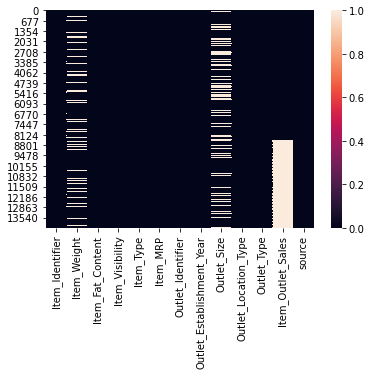

In [8]:
sns.heatmap(data.isnull())

As per the Above Visualization Null values are present in the Data set

# Filling missing values

In [9]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [10]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [11]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [12]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [13]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Univariate-Analysis

<AxesSubplot:ylabel='Frequency'>

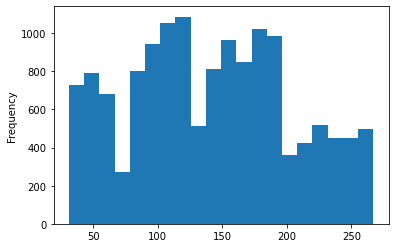

In [16]:
data["Item_MRP"].plot.hist(bins=20)

# BiVariate-Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_MRP'>

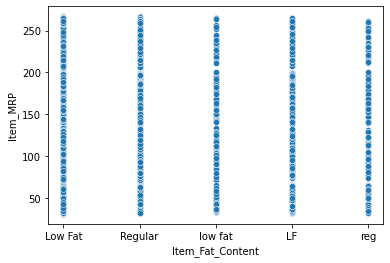

In [17]:
sns.scatterplot(x="Item_Fat_Content",y="Item_MRP",data=data)

As per above visualization, all the items fat contains equal price, it price doesn't depend upon the fat present in item

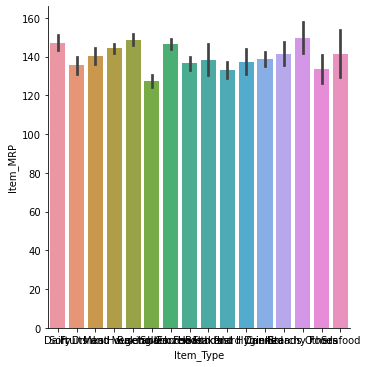

In [23]:
sns.catplot(x="Item_Type",y="Item_MRP",data=data,kind="bar")

# Numerical and One-Hot Coding of Categorical variables

In [25]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [27]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

In [71]:
cor=data.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
Item_Weight,1.000000e+00,-0.013641,0.033002,0.008569,-0.002888,0.033232,-0.029284,-0.012280,-0.004470,0.001757,...,-0.004362,-0.000390,-0.000888,0.000890,3.549387e-14,4.870556e-14,0.000960,0.000350,0.001691,0.000839
Item_Visibility,-1.364081e-02,1.000000,-0.006351,-0.099903,0.007349,-0.046622,0.043246,0.002862,0.005872,0.051019,...,0.184578,-0.038887,-0.032637,-0.040590,2.069500e-01,-3.827546e-02,-0.034870,-0.034292,-0.039234,-0.047289
Item_MRP,3.300183e-02,-0.006351,1.000000,0.440979,-0.008611,0.008816,-0.001819,-0.007035,-0.009106,-0.000658,...,0.000658,0.000697,-0.000034,-0.000023,-1.045579e-03,4.167967e-05,0.000576,-0.000832,-0.001032,0.000892
Item_Outlet_Sales,8.569012e-03,-0.099903,0.440979,1.000000,-0.009638,-0.009291,0.017512,-0.005017,-0.011734,-0.086204,...,-0.220670,0.018724,0.025262,-0.029486,-2.147572e-01,2.410042e-01,0.040916,0.001762,0.015339,0.026541
Item_Fat_Content_0,-2.888059e-03,0.007349,-0.008611,-0.009638,1.000000,-0.237917,-0.140076,-0.022004,-0.023045,-0.001888,...,0.015174,-0.002486,-0.006861,-0.002182,-5.280296e-04,4.436831e-03,0.007245,-0.009473,0.010846,-0.013157
Item_Fat_Content_1,3.323174e-02,-0.046622,0.008816,-0.009291,-0.237917,1.000000,-0.873510,-0.137217,-0.143708,0.001112,...,-0.005565,-0.001247,0.002889,0.002983,-4.575005e-03,-4.268687e-03,-0.000883,0.003352,-0.002725,0.007864
Item_Fat_Content_2,-2.928367e-02,0.043246,-0.001819,0.017512,-0.140076,-0.873510,1.000000,-0.080788,-0.084609,-0.002879,...,0.001717,-0.001636,-0.001451,-0.000982,6.981075e-04,3.580306e-03,0.001709,0.001557,-0.001151,-0.003535
Item_Fat_Content_3,-1.227994e-02,0.002862,-0.007035,-0.005017,-0.022004,-0.137217,-0.080788,1.000000,-0.013291,0.002993,...,-0.009213,0.009204,0.001350,-0.010920,2.355430e-02,1.106092e-02,-0.008980,0.001221,-0.002891,-0.011010
Item_Fat_Content_4,-4.470229e-03,0.005872,-0.009106,-0.011734,-0.023045,-0.143708,-0.084609,-0.013291,1.000000,0.007222,...,0.000738,0.007134,0.003533,0.005392,-5.223059e-03,-1.432854e-02,-0.006363,-0.006314,0.001399,0.013042
Outlet_Location_Type_0,1.756513e-03,0.051019,-0.000658,-0.086204,-0.001888,0.001112,-0.002879,0.002993,0.007222,1.000000,...,-0.164672,-0.218602,-0.217811,-0.218049,4.119011e-01,-2.190760e-01,-0.218365,-0.218207,0.560946,0.560946


<AxesSubplot:>

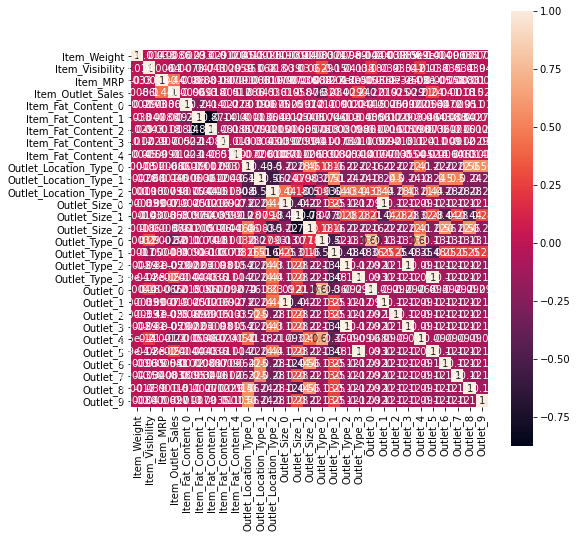

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True,square=True)

# Exporting Data

In [30]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [31]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [32]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [33]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Model Building

In [34]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [35]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [37]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [38]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model:

In [62]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [64]:
y_pred

array([1837.08337067, 1472.34957004, 1893.08086846, ..., 1827.12544795,
       3564.50092461, 1267.43685479])

In [65]:
# Measuring Accuracy
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [66]:
lr_mod=r2_score(y_train, regressor.predict(X_train))
lr_mod

0.563552345450877

# Decision Tree Model:

In [52]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [53]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [60]:
dtc_mod=r2_score(y_train, regressor.predict(X_train))
dtc_mod

0.612607185747839

# Random Forest Model:

In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [57]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1647.92119896, 1377.61511628,  603.08077424, ..., 1948.54112664,
       3714.02401359, 1292.38208499])

In [59]:
rf_mod=r2_score(y_train, regressor.predict(X_train))
rf_mod

0.612607185747839